<a href="https://colab.research.google.com/github/desmondg19/CLPSProject2/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy 

Mount google drive to read in files.

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Let's start by looking at COVID-19 data from Rhode Island. This first dataset contains information about weekly cases broken down by race/ethnicity. Running this cell will display a table with the total number of covid cases reported each week since March 1, 2020 by race.

In [ ]:
#Read in dataset RI COVID cases by Race
Download_Data3= drive.CreateFile({'id':'1dddZYTsRMpMDQCIjKSWSIehCJSChlQL2'})
Download_Data3.GetContentFile('COVID-19 Rhode Island Data - Case Trends by Race.csv')
RI_Data_Race=pd.read_csv('COVID-19 Rhode Island Data - Case Trends by Race.csv', skiprows=6, skip_blank_lines='true')

#Change the title of each column in dataframe
new_names={'Hispanic or Latino†': 'Hispanic or Latino', 'American Indian or Alaska Native*': 'American Indian or Alaska Native', 'Asian*':'Asian', 'Black or African American*':'Black or African American', 'White*':'White', 'Other race*':'Other race', 'Multiple race*':'Multiple race'}
RI_Data_Race.rename(columns=new_names, inplace=True)

#Insert new column to dataframe
weeks=[i for i in range (0, 57)]
RI_Data_Race.insert(0, "Weeks Since 3/1/20", weeks)

#Replace <5 values with 4 in dataframe
mydf=RI_Data_Race.replace('<5', 4)

#Changed dtype string to int to calculate cumsum
Asian=np.cumsum(mydf['Asian'].to_numpy(dtype=np.float32))
Hispanic_or_Latino=np.cumsum(mydf['Hispanic or Latino'].to_numpy(dtype=np.float32))
American_Indian_or_Alaska_Native=np.cumsum(mydf['American Indian or Alaska Native'].to_numpy(dtype=np.float32))
Black_or_African_American=np.cumsum(mydf['Black or African American'].to_numpy(dtype=np.float32))
White=np.cumsum(mydf['White'].to_numpy(dtype=np.float32))
Other_race=np.cumsum(mydf['Other race'].to_numpy(dtype=np.float32))
Multiple_race=np.cumsum(mydf['Multiple race'].to_numpy(dtype=np.float32))

#create new dataset with cumsums of covid cases per week by race
Race_rates={'Asian':Asian, 'Hispanic or Latino': Hispanic_or_Latino, 'American Indian or Alaska Native': American_Indian_or_Alaska_Native, 'Black or African American':Black_or_African_American, 'White':White, 'Other Race': Other_race, 'Multiple Races':Multiple_race, 'Weeks Since 3/1/2020':weeks}
df_Race_rates = pd.DataFrame(Race_rates)
df_Race_rates

,Asian,Hispanic or Latino,American Indian or Alaska Native,Black or African American,White,Other Race,Multiple Races,Weeks Since 3/1/2020
0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0
1,4.0,4.0,0.0,0.0,13.0,4.0,0.0,1
2,8.0,11.0,0.0,4.0,44.0,4.0,0.0,2
3,12.0,37.0,4.0,22.0,132.0,8.0,0.0,3
4,16.0,124.0,8.0,76.0,386.0,13.0,4.0,4
5,42.0,614.0,16.0,239.0,1132.0,25.0,9.0,5
6,65.0,1354.0,27.0,445.0,1736.0,34.0,20.0,6
7,88.0,2319.0,38.0,710.0,2451.0,54.0,34.0,7
8,127.0,3054.0,44.0,923.0,2901.0,71.0,40.0,8
9,153.0,3734.0,51.0,1116.0,3455.0,96.0,44.0,9


Running the code in this next cell will output scatter plots showing the total number of cases each week since 3/1/2020 by race. The graphs also display a line of best fit.

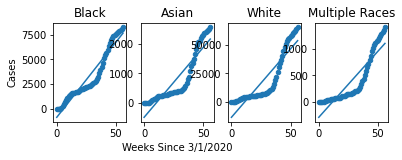

In [ ]:
#Scatter plots for number of cases since March 1, 2020 by race in RI
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(2,4,1)
df_Race_rates.plot(kind='scatter', x='Weeks Since 3/1/2020', y='Black or African American', ax=ax)
plt.xlabel('')
plt.ylabel('Cases')
plt.title('Black')
m1, b1 = np.polyfit(df_Race_rates['Weeks Since 3/1/2020'], df_Race_rates['Black or African American'], 1)
plt.plot(df_Race_rates['Weeks Since 3/1/2020'], (m1*df_Race_rates['Weeks Since 3/1/2020'] + b1))

ax = fig.add_subplot(2,4,2)
df_Race_rates.plot(kind='scatter', x='Weeks Since 3/1/2020', y='Asian', ax=ax)
plt.xlabel('Weeks Since 3/1/2020')
plt.ylabel('')
plt.title('Asian')
m2, b2 = np.polyfit(df_Race_rates['Weeks Since 3/1/2020'], df_Race_rates['Asian'], 1)
plt.plot(df_Race_rates['Weeks Since 3/1/2020'], m2*df_Race_rates['Weeks Since 3/1/2020'] + b2)

ax = fig.add_subplot(2,4,3)
df_Race_rates.plot(kind='scatter', x='Weeks Since 3/1/2020', y='White', ax=ax)
plt.xlabel('')
plt.ylabel('')
plt.title('White')
m3, b3 = np.polyfit(df_Race_rates['Weeks Since 3/1/2020'], df_Race_rates['White'], 1)
plt.plot(df_Race_rates['Weeks Since 3/1/2020'], m3*df_Race_rates['Weeks Since 3/1/2020'] + b3)


ax = fig.add_subplot(2,4,4)
df_Race_rates.plot(kind='scatter', x='Weeks Since 3/1/2020', y='Multiple Races', ax=ax)
plt.xlabel('')
plt.ylabel('')
plt.title('Multiple Races')
m4, b4 = np.polyfit(df_Race_rates['Weeks Since 3/1/2020'], df_Race_rates['Multiple Races'], 1)
plt.plot(df_Race_rates['Weeks Since 3/1/2020'], m4*df_Race_rates['Weeks Since 3/1/2020'] + b4)

plt.show()

This next cell will ask for an input for the number of weeks since 3/1/2020. It will then output the expected number of cases by race (Black/African American, Asian, White, Multiple Races) based on the equations for the line of best fit.

In [ ]:
#Create functions based on linear regression
m1=int(b1)
b1=int(b1)
print('Enter a positive value for x (Weeks Since 3/1/2020):')
x = input()
x=int(x)


def Black_Rates(x, m1, b1):
  y=m1*x+b1
  return(y)


def Asian_Rates(x, m2, b2):
  y=m2*x+b2
  return(y)


def White_Rates(x, m3, b3):
  y=m3*x+b3
  return(y)


def Mult_Rates(x, m4, b4):
  y=m4*x+b4
  return(y)

b=Black_Rates(x, m1, b1)
a=Asian_Rates(x, m2, b2)
w=White_Rates(x, m3, b3)
m=Mult_Rates(x, m4, b4)

print(b,a,w,m)


Enter a positive value for x (Weeks Since 3/1/2020):
-858 -858


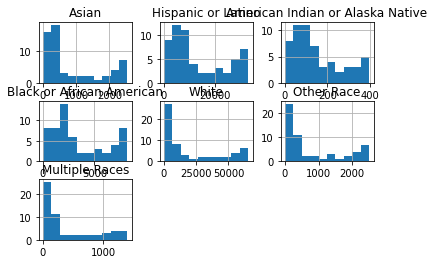

In [ ]:
df_Race_rates_hist=df_Race_rates.drop(columns=['Weeks Since 3/1/2020'])

#create histogram of total cumulative cases by race since 3/1/2020 in RI
df_Race_rates_hist.hist()

plt.show()

This next cell reads in data which describes the number of covid cases each week in each town/city in RI.

In [ ]:
#Read in dataset Rhode Island Demographics
Download_Data4= drive.CreateFile({'id':'1a87E9gsZqLSa1pBEEBrlUsKtGUS5sTs1'})
Download_Data4.GetContentFile('COVID-19 Rhode Island Data - Municipal Rate Trends.csv')
RI_Data_Municipality_Rates=pd.read_csv('COVID-19 Rhode Island Data - Municipal Rate Trends.csv', skiprows=7, skip_blank_lines='true')


#Remove row with total population
RI_Data_Municipality_Rates.drop([0])


#Replace asteriks with 0
mydf1=RI_Data_Municipality_Rates.replace('*', 0)
mydf1=mydf1.replace(',', '')
mydf1=mydf1.drop([0])
mydf1.head()

#changed string to int to calculate cumsum
Barrington=np.cumsum(mydf1['BARRINGTON'].to_numpy(dtype=np.float32))
Bristol=np.cumsum(mydf1['BRISTOL'].to_numpy(dtype=np.float32))
Burrillville=np.cumsum(mydf1['BURRILLVILLE'].to_numpy(dtype=np.float32))
Central_falls=np.cumsum(mydf1['CENTRAL FALLS'].to_numpy(dtype=np.float32))
Charlestown=np.cumsum(mydf1['CHARLESTOWN'].to_numpy(dtype=np.float32))
Coventry=np.cumsum(mydf1['COVENTRY'].to_numpy(dtype=np.float32))
Cranston=np.cumsum(mydf1['CRANSTON'].to_numpy(dtype=np.float32))
Cumberland=np.cumsum(mydf1['CUMBERLAND'].to_numpy(dtype=np.float32))
East_Greenwich=np.cumsum(mydf1['EAST GREENWICH'].to_numpy(dtype=np.float32))
East_Providence=np.cumsum(mydf1['EAST PROVIDENCE'].to_numpy(dtype=np.float32))
Exeter=np.cumsum(mydf1['EXETER'].to_numpy(dtype=np.float32))
Foster=np.cumsum(mydf1['FOSTER'].to_numpy(dtype=np.float32))
Glocester=np.cumsum(mydf1['GLOCESTER'].to_numpy(dtype=np.float32))
Hopkinton=np.cumsum(mydf1['HOPKINTON'].to_numpy(dtype=np.float32))
Jamestown=np.cumsum(mydf1['JAMESTOWN'].to_numpy(dtype=np.float32))
Johnston=np.cumsum(mydf1['JOHNSTON'].to_numpy(dtype=np.float32))
Lincoln=np.cumsum(mydf1['LINCOLN'].to_numpy(dtype=np.float32))
Little_Compton=np.cumsum(mydf1['LITTLE COMPTON'].to_numpy(dtype=np.float32))
Middletown=np.cumsum(mydf1['MIDDLETOWN'].to_numpy(dtype=np.float32))
Narragansett=np.cumsum(mydf1['NARRAGANSETT'].to_numpy(dtype=np.float32))
New_Shoreham=np.cumsum(mydf1['NEW SHOREHAM'].to_numpy(dtype=np.float32))
Newport=np.cumsum(mydf1['NEWPORT'].to_numpy(dtype=np.float32))
North_Kingstown=np.cumsum(mydf1['NORTH KINGSTOWN'].to_numpy(dtype=np.float32))
North_Providence=np.cumsum(mydf1['NORTH PROVIDENCE'].to_numpy(dtype=np.float32))
North_Smithfield=np.cumsum(mydf1['NORTH SMITHFIELD'].to_numpy(dtype=np.float32))
Pawtucket=np.cumsum(mydf1['PAWTUCKET'].to_numpy(dtype=np.float32))
Portsmouth=np.cumsum(mydf1['PORTSMOUTH'].to_numpy(dtype=np.float32))
Providence=np.cumsum(mydf1['PROVIDENCE'].to_numpy(dtype=np.float32))
Richmond=np.cumsum(mydf1['RICHMOND'].to_numpy(dtype=np.float32))
Scituate=np.cumsum(mydf1['SCITUATE'].to_numpy(dtype=np.float32))
Smithfield=np.cumsum(mydf1['SMITHFIELD'].to_numpy(dtype=np.float32))
South_Kingstown=np.cumsum(mydf1['SOUTH KINGSTOWN'].to_numpy(dtype=np.float32))
Tiverton=np.cumsum(mydf1['TIVERTON'].to_numpy(dtype=np.float32))
Warren=np.cumsum(mydf1['WARREN'].to_numpy(dtype=np.float32))
Warwick=np.cumsum(mydf1['WARWICK'].to_numpy(dtype=np.float32))
West_Greenwich=np.cumsum(mydf1['WEST GREENWICH'].to_numpy(dtype=np.float32))
West_Warwick=np.cumsum(mydf1['WEST WARWICK'].to_numpy(dtype=np.float32))
Westerly=np.cumsum(mydf1['WESTERLY'].to_numpy(dtype=np.float32))
Woonsocket=np.cumsum(mydf1['WOONSOCKET'].to_numpy(dtype=np.float32))

#made a dataframe with cumulative covid cases in each town every week since 3/1/2020
Town_rates={'Barrington':Barrington, 'Bristol': Bristol, 'Burrillville': Burrillville, 'Central Falls':Central_falls, 'Charlestown':Charlestown, 'Coventry': Coventry, 'Cranston':Cranston, 'Cumberland':Cumberland, 'East Greenwich':East_Greenwich, 'East Providence':East_Providence, 'Exeter':Exeter, 'Foster':Foster, 'Glocester':Glocester, 'Hopkinton':Hopkinton, 'Jamestown':Jamestown, 'Johnston':Johnston, 'Lincoln':Lincoln, 'Little Compton':Little_Compton, 'Middletown':Middletown, 'Narragansett':Narragansett, 'New Shoreham':New_Shoreham, 'Newport':Newport, 'North Kingstown':North_Kingstown, 'North Providence':North_Providence, 'North Smithfield':North_Smithfield, 'Pawtucket':Pawtucket, 'Portsmouth':Portsmouth, 'Providence':Providence, 'Richmond':Richmond, 'Scituate':Scituate, 'Smithfield':Smithfield, 'South Kingstown':South_Kingstown, 'Tiverton':Tiverton, 'Warren':Warren, 'Warwick':Warwick, 'West Greenwich':West_Greenwich, 'West Warwick':West_Warwick, 'Westerly':Westerly,'Woonsocket':Woonsocket}
df_Town_rates = pd.DataFrame(Town_rates)


Running this next cell will output two scatter plots. The first plot shows the per capita income for every town and the second shows total covid cases for every town.

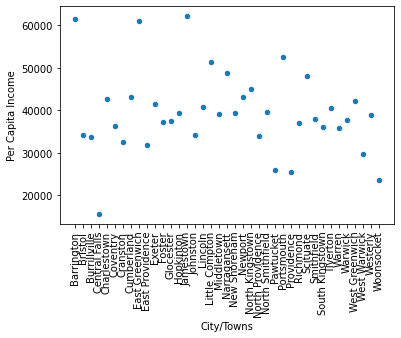

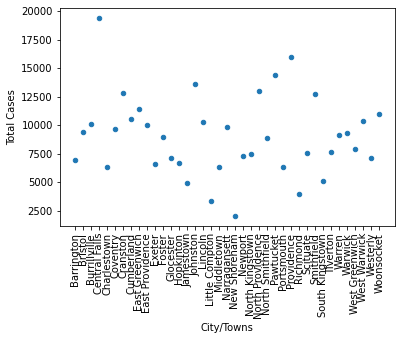

In [ ]:
#Read in dataframe for RI Per Capita Income
Download_Data5= drive.CreateFile({'id':'1J0hidUHUx-zrwhzxWzS9LVqvJ5XCAg9L'})
Download_Data5.GetContentFile('RI_Towns_Income.xlsx')
RI_Income=pd.read_excel('RI_Towns_Income.xlsx')
RI_Income

#Add income data to covid data by town
df_Town_rates_t=df_Town_rates.T
Income=RI_Income['Per Capita Income'].to_list()
df_Town_rates_t.insert(0, "Per Capita Income", Income)
df_Town_rates_t.insert(0, "City/Towns", df_Town_rates_t.index)
df_Town_rates_t.insert(0, "Total Cases", df_Town_rates_t[df_Town_rates_t.columns[-1]].values)


#Rename the index
df_Town_rates_t=df_Town_rates_t.rename_axis('City/Towns')


Totals=df_Town_rates_t[df_Town_rates_t.columns[-1]].replace('\n','',regex=True)


#Correlation plot

df_Town_rates_t.plot(kind='scatter',x='City/Towns', y='Per Capita Income', rot=90)

df_Town_rates_t.plot(kind='scatter',x='City/Towns', y='Total Cases', rot=90)



This next cell runs a one-way Anova and Multicomparison test to determine if there is a significant difference in the number of COVID cases by race in RI.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


       Asian  Black or African American        White  Multiple Races
1  44.614037                 144.070175  1147.736816       24.561403
F statistic = 40.598 and probability p = 0.000
<class 'pandas.core.series.Series'>
                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
          group1                    group2           meandiff p-adj    lower     upper   reject
-----------------------------------------------------------------------------------------------
                    Asian Black or African American   99.4561 0.8205 -211.2876  410.1999  False
                    Asian            Multiple Races  -20.0526    0.9 -330.7963  290.6911  False
                    Asian                     White 1103.1228  0.001  792.3791 1413.8665   True
Black or African American            Multiple Races -119.5088 0.7269 -430.2525  191.2349  False
Black or African American                     White 1003.6667  0.001   692.923 1314.4104   True
           

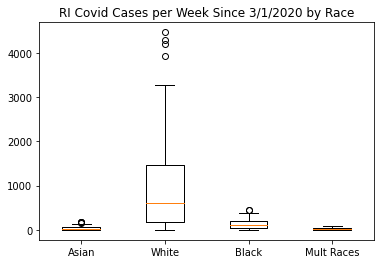

In [ ]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

#Find average number of cases by race
Asian_av=[np.mean(mydf['Asian'].to_numpy(dtype=np.float32))]
Black_av=[np.mean(mydf['Black or African American'].to_numpy(dtype=np.float32))]
Mult_av=[np.mean(mydf['Multiple race'].to_numpy(dtype=np.float32))]
White_av=[np.mean(mydf['White'].to_numpy(dtype=np.float32))]

#Create new dataset with average number of cases per week since March 1, 2020
Race_av={'Asian':Asian_av, 'Black or African American':Black_av, 'White':White_av, 'Multiple Races':Mult_av}
df_Race_av = pd.DataFrame(Race_av, index=[1])
print(df_Race_av)

Asian1=mydf['Asian'].to_numpy(dtype=np.float32)
White1=mydf['White'].to_numpy(dtype=np.float32)
Black1=mydf['Black or African American'].to_numpy(dtype=np.float32)
Mult1=mydf['Multiple race'].to_numpy(dtype=np.float32)

myindex=['Week {}'.format(k) for k in range (57)]
Race={'Index':myindex, 'Asian':Asian1, 'White':White1, 'Black or African American':Black1, 'Multiple Races':Mult1}
df_Race=pd.DataFrame(Race).set_index('Index')


#ANOVA to determine if there is a statistical difference between the number of cases each week since 3/1/2020 by race in RI
F,p=scipy.stats.f_oneway(White1, Black1, Mult1, Asian1)
print('F statistic = {:5.3f} and probability p = {:5.3f}'.format(F, p)) 

#convert dataframe to two columns
stacked_data = df_Race.stack().reset_index() 
stacked_data = stacked_data.rename(columns={'level_0': 'id', 'level_1': 'treatment', 0:'result'})
print(type(stacked_data['result']))
MultiComp = MultiComparison(stacked_data['result'].to_numpy(dtype=np.float64), stacked_data['treatment'])
print(MultiComp.tukeyhsd().summary())


#Create boxplot for COVID cases by race
Asian3=pd.to_numeric(df_Race['Asian'])
White3=pd.to_numeric(df_Race['White'])
Black3=pd.to_numeric(df_Race['Black or African American'])
Mult3=pd.to_numeric(df_Race['Multiple Races'])

#White3=df_Race['White'].to_numeric()
#Black3=df_Race['Black or African American'].to_numeric()
#Mult3=df_Race['Multiple Races'].to_numeric()


plt.boxplot([Asian1, White1, Black1, Mult1])
x=[1, 2, 3, 4]
labels=['Asian', 'White', 'Black', 'Mult Races']
plt.xticks(x, labels)
plt.title('RI Covid Cases per Week Since 3/1/2020 by Race')

plt.show()


After running a one-way Anova, there is sufficient evidence to conclude that there are significant differences in the number of covid cases in RI since 3/1/2020 by race. Further tests indicate that there are significant differences between Asian and White groups, Black or African American and White groups, and Multiple Races and White groups. This suggests individuals identifying as white were more likely to contract covid. However, further tests would be needed to look at the distribution based on demographics.

Demographics of RI: White: 80.46% Black or African American: 6.77% Other race: 5.47% Asian: 3.40% Two or more races: 3.33% Native American: 0.50% Native Hawaiian or Pacific Islander: 0.08%

This next cell codes for a one-way Anova and multicomparison test to look at the effects of race on covid cases; however, it corrects for the percent make-up of each race in the population.

                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                     
          group1                    group2          meandiff p-adj   lower     upper   reject
---------------------------------------------------------------------------------------------
                    Asian Black or African American   8.2367   0.9 -240.5223  256.9957  False
                    Asian            Multiple Races   -0.699   0.9  -249.458    248.06  False
                    Asian                     White 921.9522 0.001  673.1932 1170.7112   True
Black or African American            Multiple Races  -8.9357   0.9 -257.6946  239.8233  False
Black or African American                     White 913.7155 0.001  664.9565 1162.4745   True
           Multiple Races                     White 922.6512 0.001  673.8922 1171.4101   True
---------------------------------------------------------------------------------------------
F statistic = 40.598 and probability p = 0.000


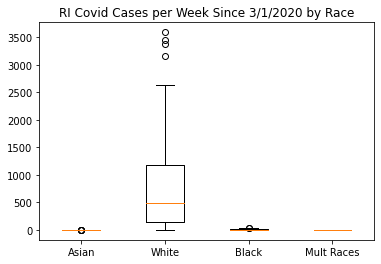

In [ ]:
#Create new dataset with average number of cases per week since March 1, 2020 by population demographics
myindex1=['Week {}'.format(k) for k in range (57)]
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

#multiply each variable by Rhode Island Demographics (based on American Community Survey)
Asian2=mydf['Asian'].to_numpy(dtype=np.float64)*.034
White2=mydf['White'].to_numpy(dtype=np.float64)*.8046
Black2=mydf['Black or African American'].to_numpy(dtype=np.float64)*.0677
Mult2=mydf['Multiple race'].to_numpy(dtype=np.float64)*.0333


Race1={'Index':myindex1, 'Asian':Asian2, 'White':White2, 'Black or African American':Black2, 'Multiple Races':Mult2}
df_Race_demo=pd.DataFrame(Race1).set_index('Index')

#convert dataframe to two columns
stacked_data1 = df_Race_demo.stack().reset_index() 
stacked_data1 = stacked_data1.rename(columns={'level_0': 'id', 'level_1': 'treatment', 0:'result'})
#print(type(stacked_data['result']))
MultiComp1 = MultiComparison(stacked_data1['result'].to_numpy(dtype=np.float64), stacked_data1['treatment'])
print(MultiComp1.tukeyhsd().summary())


#ANOVA to determine if there is a statistical difference between the number of cases each week since 3/1/2020 by race in RI
F,p=scipy.stats.f_oneway(White1, Black1, Mult1, Asian1)
#F,p=scipy.stats.f_oneway(White, Black_or_African_American, Multiple_race, Asian)
print('F statistic = {:5.3f} and probability p = {:5.3f}'.format(F, p)) 



plt.boxplot([Asian2, White2, Black2, Mult2])
x=[1, 2, 3, 4]
labels=['Asian', 'White', 'Black', 'Mult Races']
plt.xticks(x, labels)
plt.title('RI Covid Cases per Week Since 3/1/2020 by Race')

plt.show()

After running a one-way Anova, there is sufficient evidence to conclude that there are significant differences in the number of covid cases in RI since 3/1/2020 by race (corrected for % of population). Further tests indicate that there are significant differences between Asian and White groups, Black or African American and White groups, and Multiple Races and White groups. This suggests individuals identifying as white were more likely to contract covid. However, further tests would be needed to look at the distribution based on demographics.

Now, let's take a look at Pennsyvlania! Pennsylvania has really robust vaccination data, so we are able to look at vaccinations on a county by county level. Below, we generated graphs comparing age and vaccination rates in Pennsyvlvania's four largest counties. Two of these counties (Montgomery and Bucks) are disproportionately wealthy and suburban, while the other two counties (Philadelphia and Allegheny) are more urban and less wealthy.

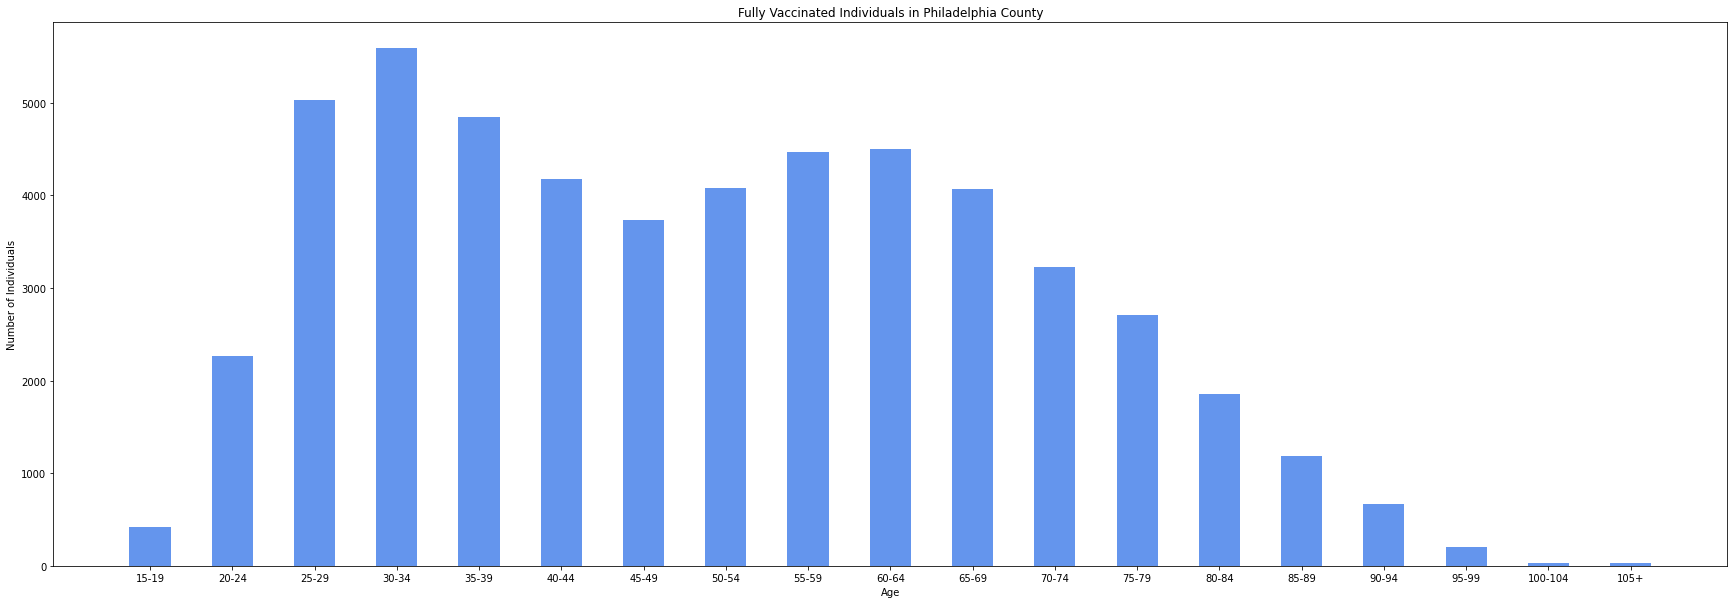

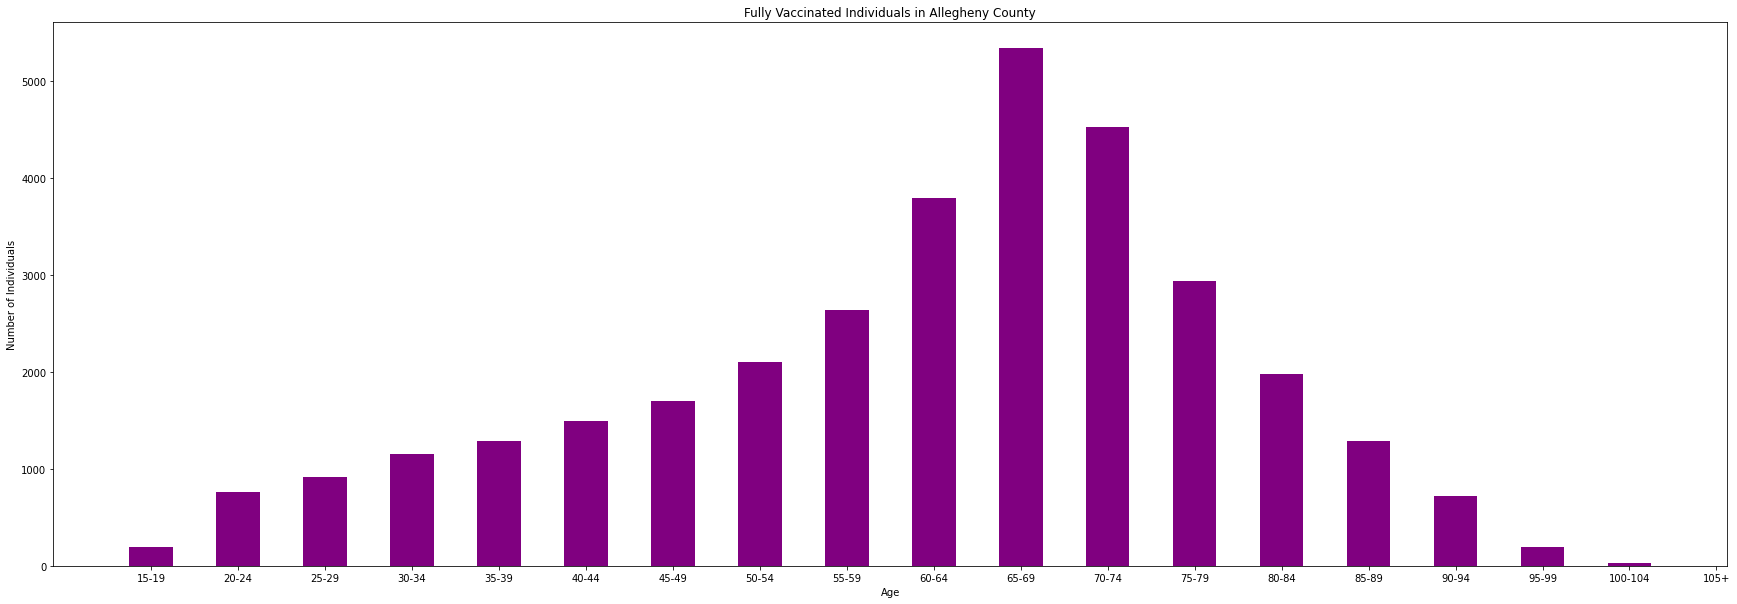

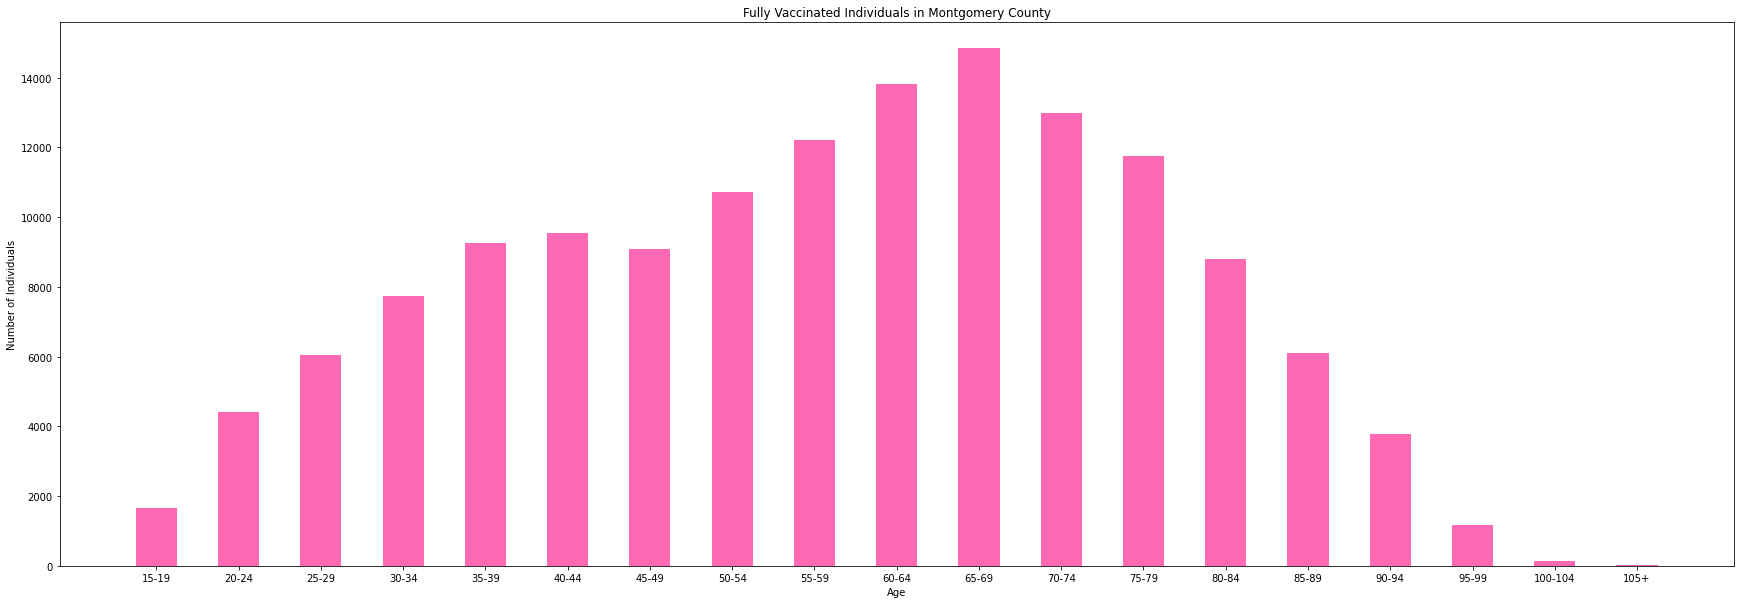

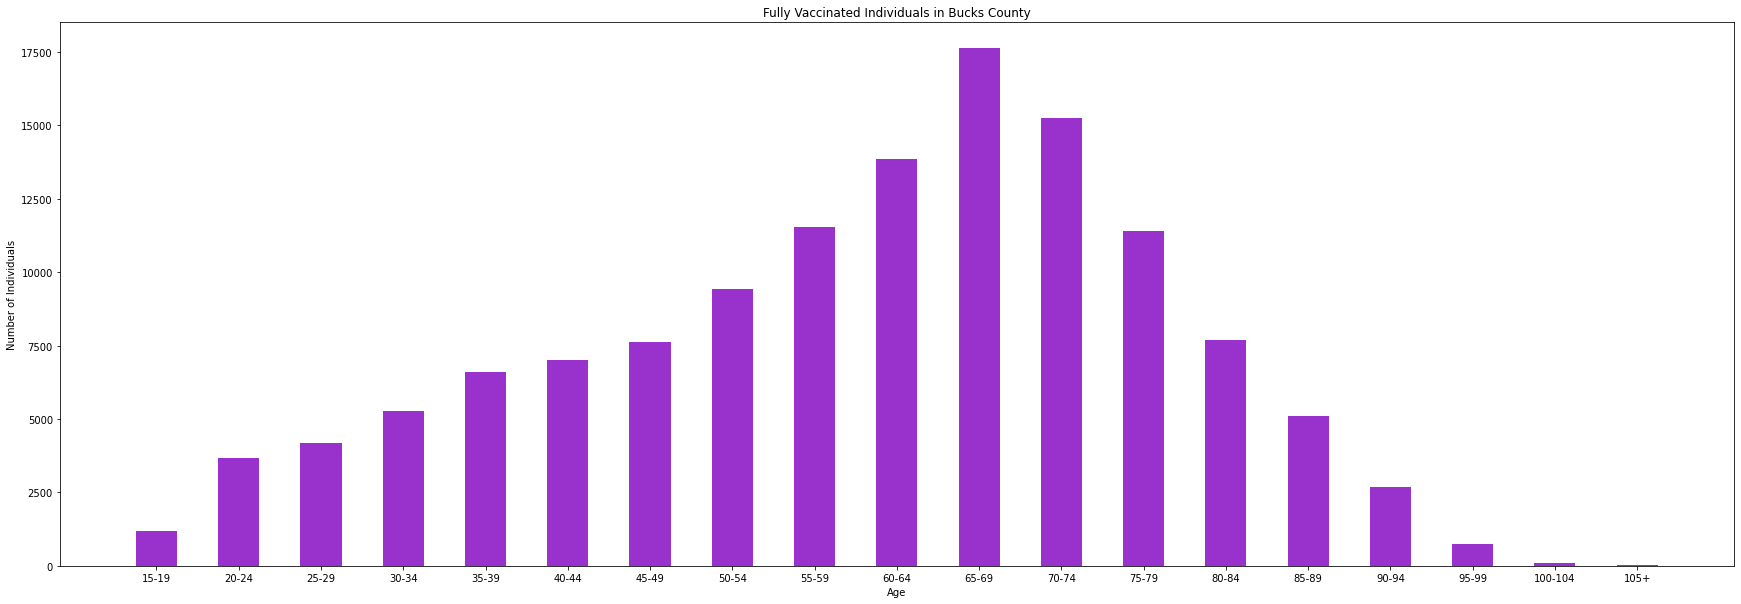

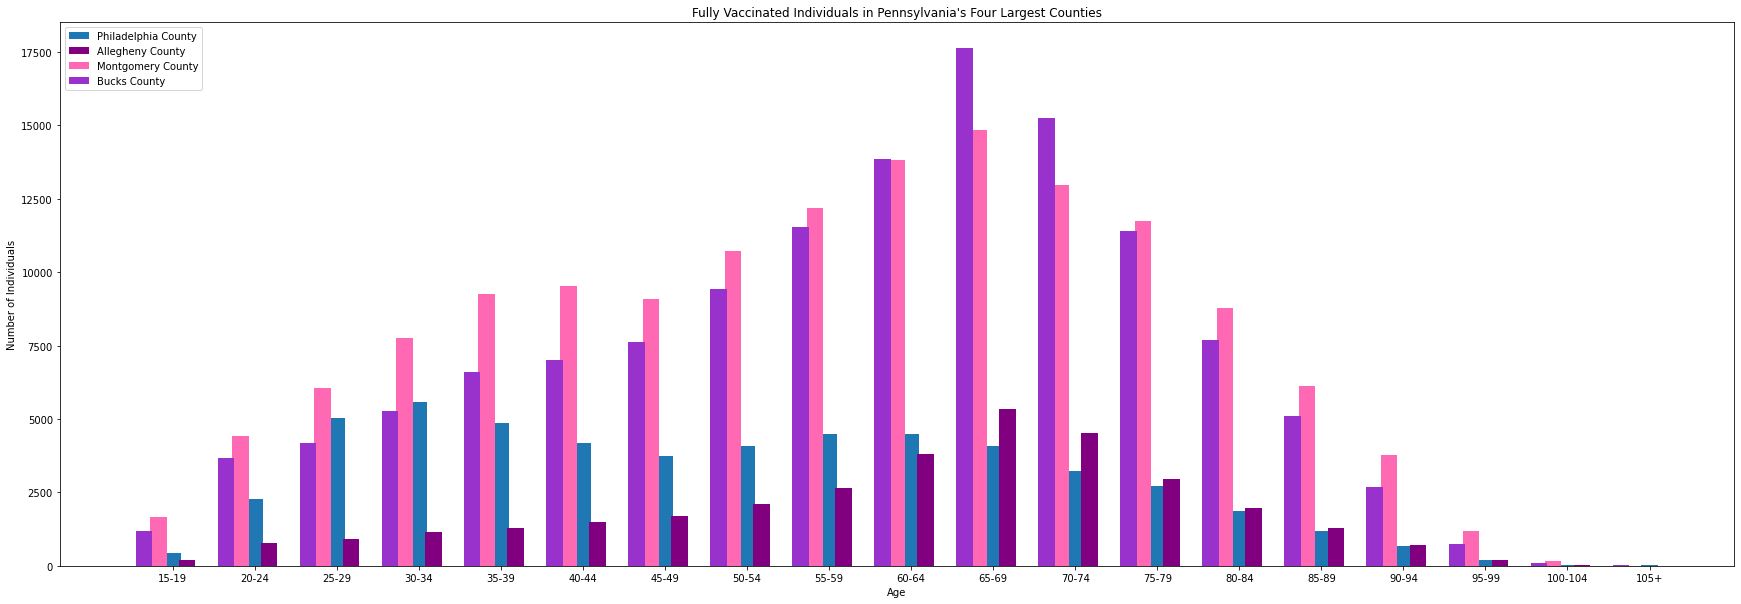

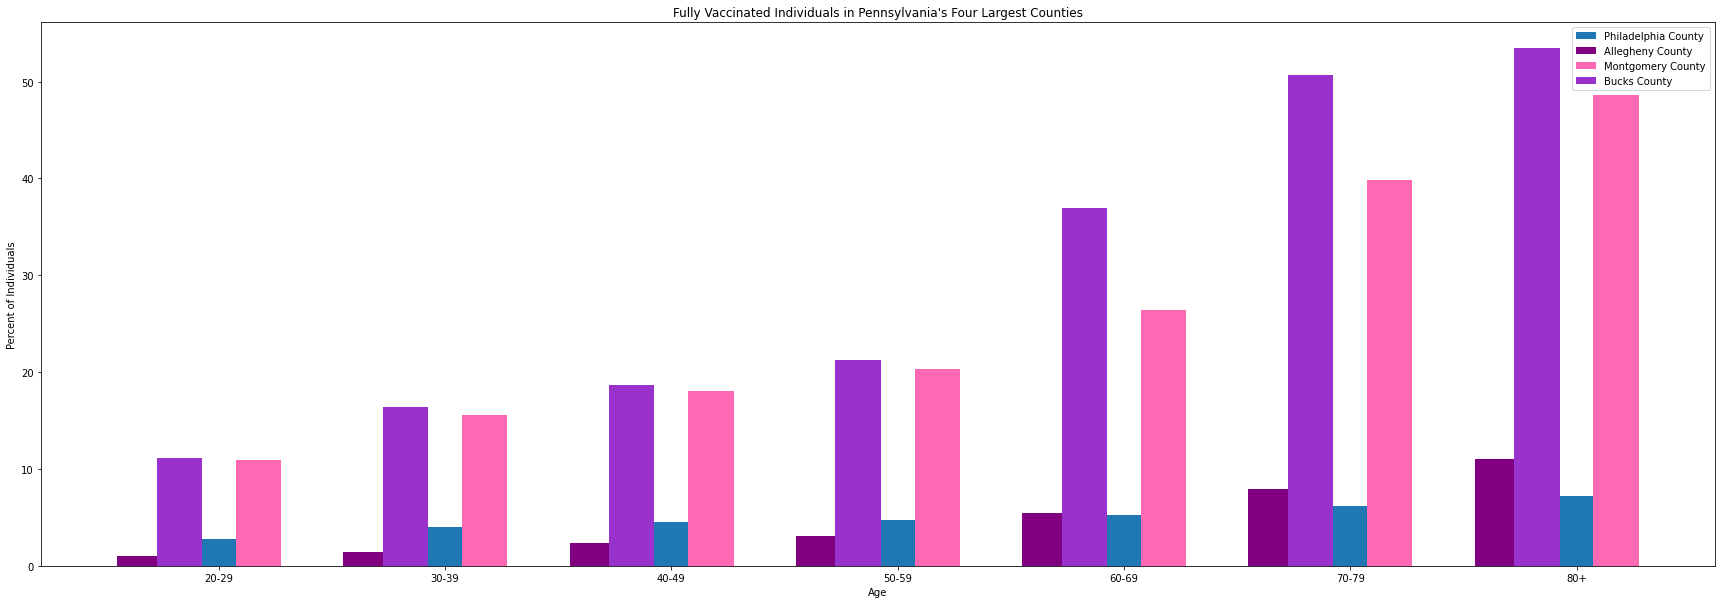

In [5]:
##make sure to run the import block at the top of this project before running the below code!!

pennvax = 'https://raw.githubusercontent.com/desmondg19/CLPSProject2/main/pavaccine.csv' ##importing datasets for pennsyvlania vaccination rates
dataset1 = pd.read_csv(pennvax)
phillyvax = 'https://raw.githubusercontent.com/desmondg19/CLPSProject2/main/4%20most%20populous%20counties.csv'
dataset2 = pd.read_csv(phillyvax)


#Philadelphia County Graph 
X = list(dataset2.iloc[:, 0]) ##identifying the x axis in our data
Y = list(dataset2.iloc[:, 1]) ##identifying the y axis in our data 
plt.subplots(1,1,figsize=(30,10))
plt.bar(X,Y,  width =.5, color = 'cornflowerblue') ##generating our bar graph and assigning a specific color and width 
plt.title("Fully Vaccinated Individuals in Philadelphia County")
plt.xlabel("Age")
plt.ylabel("Number of Individuals")

#Allegheny County Graph
Z = list(dataset2.iloc[:, 8])
plt.subplots(1,1,figsize=(30,10))
plt.bar(X,Z,  width =.5, color = 'purple')
plt.title("Fully Vaccinated Individuals in Allegheny County")
plt.xlabel("Age")
plt.ylabel("Number of Individuals")

#Montgomery County Graph
A = list(dataset2.iloc[:, 9])
plt.subplots(1,1,figsize=(30,10))
plt.bar(X,A, width =.5, color = 'hotpink')
plt.title("Fully Vaccinated Individuals in Montgomery County")
plt.xlabel("Age")
plt.ylabel("Number of Individuals")

#Bucks County Graph
B = list(dataset2.iloc[:, 10])
plt.subplots(1,1,figsize=(30,10))
plt.bar(X,B,  width =.5, color = 'darkorchid')
plt.title("Fully Vaccinated Individuals in Bucks County")
plt.xlabel("Age")
plt.ylabel("Number of Individuals")

##comparing all 4 counties for total amount of vaccinations
q = np.arange(len(X)) ##setting the length of the x axis
width = .35
fig, ax = plt.subplots(1,1,figsize=(30,10))
rects1 = ax.bar(X, Y, .2, label='Philadelphia County') ##ensuring the X axis labels remain ages
rects2 = ax.bar(q+width/2, Z, .2, label='Allegheny County', color = 'purple')
rects3 = ax.bar(q-width/2, A, .2, label='Montgomery County', color = 'hotpink')
rects4 = ax.bar(q-width, B, .2, label='Bucks County', color = 'darkorchid')
plt.title("Fully Vaccinated Individuals in Pennsylvania's Four Largest Counties")
plt.xlabel("Age")
plt.ylabel("Number of Individuals")
plt.legend() ##displaying the graph legend 

##comparing the counties percentage-wise
percentagevax = 'https://raw.githubusercontent.com/desmondg19/CLPSProject2/main/papercentages.csv'
dataset4 = pd.read_csv(percentagevax) ##importing a new data set where everything is quantified by percentages as opposed to raw numbers
C = list(dataset4.iloc[:,0]) ##identifying each county's vaccination rates by age 
D = list(dataset4.iloc[:,3])
E = list(dataset4.iloc[:,6])
F = list(dataset4.iloc[:,9])
G = list(dataset4.iloc[:,12])
         
q = np.arange(len(C))
width = .35
fig, ax = plt.subplots(1,1,figsize=(30,10))
rects5 = ax.bar(C, D, .2, label='Philadelphia County')
rects6 = ax.bar(q-width, E, .2, label='Allegheny County', color = 'purple')
rects7 = ax.bar(q+width/2, F, .2, label='Montgomery County', color = 'hotpink')
rects8 = ax.bar(q-width/2, G, .2, label='Bucks County', color = 'darkorchid')
plt.title("Fully Vaccinated Individuals in Pennsylvania's Four Largest Counties")
plt.xlabel("Age")
plt.ylabel("Percent of Individuals")
plt.legend()
         

So what does the above data tell us? First, we can see that although a larger amount of middle aged individuals are being vaccinated, percentage-wise, older indivisuals are being vaccinated at a higher rate.

Additionally, we can see some very real inequities in vaccinations accross Pennsylvania. From this data, it appears that a higher percentage of individuals in the wealthier counties (Montgomery and Bucks) are vaccinated compared to the less wealthy counties (Philadelphia and Allegheny).

Now, let's look at how Pennsylvania is vaccinating accross the entire state!

Text(0, 0.5, 'Percent of Population')

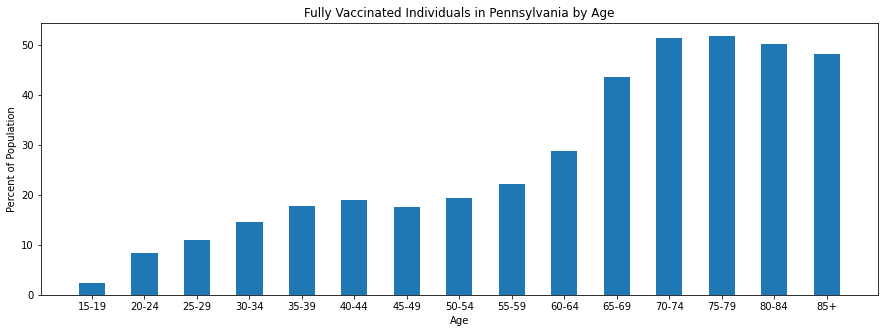

In [6]:
##generating a graph for state wide vaccination trends
newpennvax = 'https://raw.githubusercontent.com/desmondg19/CLPSProject2/main/PA%20Vax%20Data%20Updated%20-%20Sheet1.csv'
dataset3 = pd.read_csv(newpennvax)
X = list(dataset3.iloc[:,0])
Y = list(dataset3.iloc[:,7])
plt.figure(figsize = (15,5))
plt.bar(X,Y, width = .5)
plt.title("Fully Vaccinated Individuals in Pennsylvania by Age")
plt.xlabel("Age")
plt.ylabel("Percent of Population")

As shown above, the percentages per age group look much closer to the data from Bucks and Montgomery counties than the data from Philadelphia and Allegheny counties. This is one of the problems with using data from such large populations for analysis! Pennsylvania seems to be doing relatively well according to this one graph, but when we look at a closer level, we can see disparities. 

Now, let's look at Rhode Island!

Text(0, 0.5, 'Percent of Population')

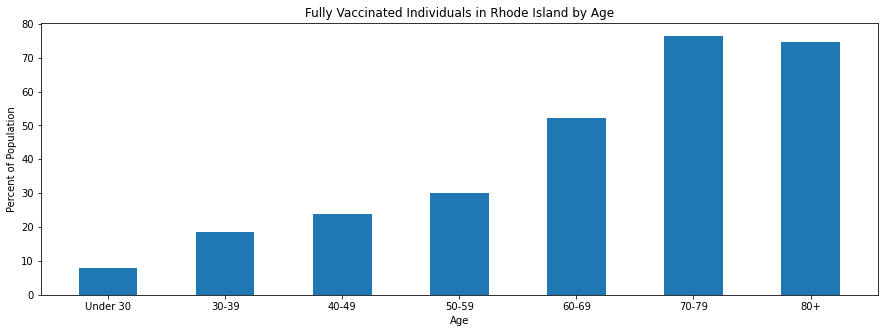

In [7]:
##generating a graph for statewide vaccination trends in Rhode Island
rivax = 'https://raw.githubusercontent.com/desmondg19/CLPSProject2/main/RI%20Vax%20Data%20-%20Sheet1.csv'##importing Rhode Island Data
dataset5 = pd.read_csv(rivax)
X = list(dataset5.iloc[:,0])
Y = list(dataset5.iloc[:,1])
plt.figure(figsize = (15,5))
plt.bar(X,Y, width =0.5)
plt.title("Fully Vaccinated Individuals in Rhode Island by Age")
plt.xlabel("Age")
plt.ylabel("Percent of Population")

Rhode Island's age-related vaccine data is not as robust as Pennsyvlania's data, so we cannot analyze it on a county by county level in the same way. We can, however, still see some state-wide trends. It appears that like Pennsylvania, Rhode Island is doing a relatively good job on a state-wide level of vaccinating elderly populations ahead of younger individuals. 

Now let's see how both states are doing in comparison to national trends!

Text(0, 0.5, 'Percent Difference')

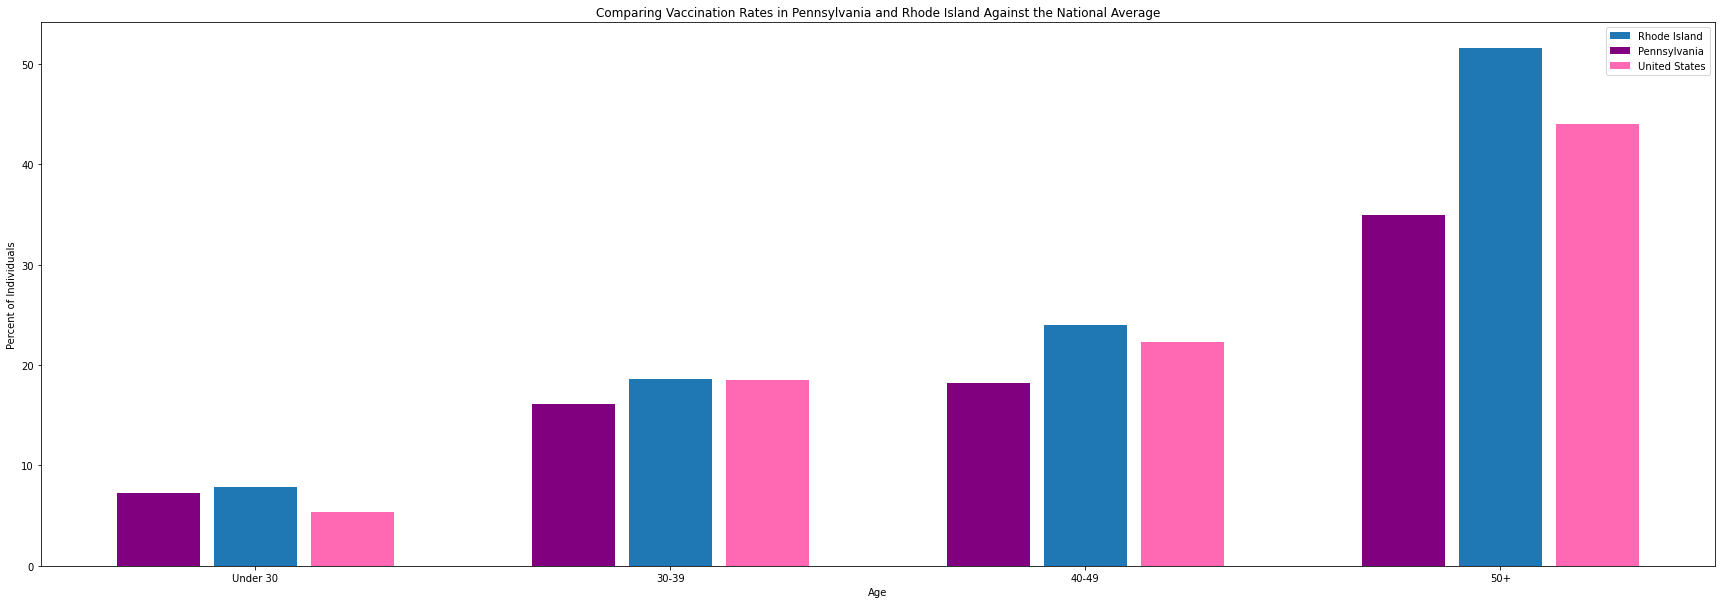

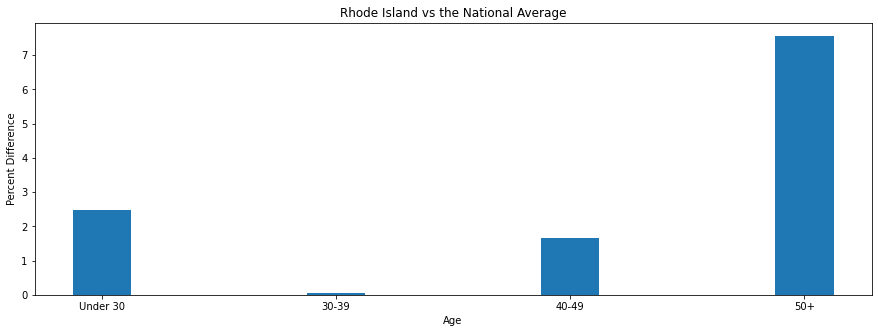

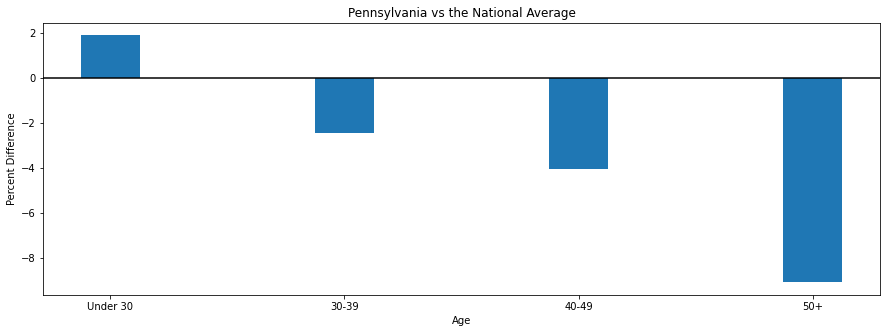

In [8]:
comparevax = 'https://raw.githubusercontent.com/desmondg19/CLPSProject2/main/Comparative%20Data%20-%20Sheet1.csv' ##importing data that compares Rhode Island, Pennsylvania and National Data together
finaldata = pd.read_csv(comparevax)
X = list(finaldata.iloc[:,0]) ##x axis labels
R = list(finaldata.iloc[:,3]) ##Rhode Island Data
P = list(finaldata.iloc[:,4]) #Pennsylvania Data
U = list(finaldata.iloc[:,7]) ##National Data
RU = list(finaldata.iloc[:,8]) ##Rhode Island minus US Vaccine Rates
PU = list(finaldata.iloc[:,9]) ## Pennsylvania minus US Vaccine rates

##Triple bar graph comparing percent vaccinated by age group in all three categories 
q = np.arange(len(X))
width = .35
fig, ax = plt.subplots(1,1,figsize=(30,10))
rects5 = ax.bar(X, R, .2, label='Rhode Island')
rects6 = ax.bar(q-width/(1.5), P, .2, label='Pennsylvania', color = 'purple')
rects7 = ax.bar(q+width/(1.5), U, .2, label='United States', color = 'hotpink')
plt.title("Comparing Vaccination Rates in Pennsylvania and Rhode Island Against the National Average")
plt.xlabel("Age")
plt.ylabel("Percent of Individuals")
plt.legend()


##Comparing Rhode Island against the National Average
plt.figure(figsize = (15,5))
plt.bar(X,RU, width =0.25)
plt.title("Rhode Island vs the National Average")
plt.xlabel("Age")
plt.ylabel("Percent Difference")

##Comparing Pennsylvania against the National Average
plt.figure(figsize = (15,5))
plt.bar(X,PU, width =0.25)
plt.axhline(y=0, color='black', linestyle='-')
plt.title("Pennsylvania vs the National Average")
plt.xlabel("Age")
plt.ylabel("Percent Difference")

When we compare Rhode Island and Pennsylvania to national trends, what do we see? It appears that Rhode Island is doing a better job at vaccinating individuals in every age group compared to the national average. Pennsylvania, on the other hand, is behind in vaccinations in every age group except individuals under 30, and is especially behind in vaccinating individuals over 50. 